In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/py_scripts/')
import find_citation
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import copy
import re


In [2]:
pwd

'/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/notebooks'

In [2]:
df = pd.read_csv('/Users/kevingmagana/DSI/capstone/case_corpus.csv')

In [3]:
data = df.case_text
document = data[1]
df.head()

,Unnamed: 0,Unnamed: 0.1,case_text,case_title,court,date,docket,tags,type_of_law,url,web_source,html_format,title_date
0,0,1,"United States Court of Appeals,Tenth Circuit.\...",Porro v. Barnes,United States Tenth Circuit,11/09/2010,10-6002,"Civil Rights, Constitutional Law, Immigration ...",case,http://caselaw.findlaw.com/us-10th-circuit/154...,findlaw.com,"[<div class=""caselawcontent searchable-content...",Porro v. Barnes 11/09/2010
1,1,2,"United States Court of Appeals,Tenth Circuit.\...",Garcia-Carbajal v. Holder,United States Tenth Circuit,11/05/2010,09-9558,"Administrative Law, Immigration Law",case,http://caselaw.findlaw.com/us-10th-circuit/154...,findlaw.com,"[<div class=""caselawcontent searchable-content...",Garcia-Carbajal v. Holder 11/05/2010
2,2,3,"United States Court of Appeals,Tenth Circuit.\...",US v. Rendon-Alamo,United States Tenth Circuit,10/19/2010,10-2089,"Sentencing, Immigration Law, Criminal Law & Pr...",case,http://caselaw.findlaw.com/us-10th-circuit/154...,findlaw.com,"[<div class=""caselawcontent searchable-content...",US v. Rendon-Alamo 10/19/2010
3,3,5,"United States Court of Appeals,Tenth Circuit.\...",Iliev v. Holder,United States Tenth Circuit,07/19/2010,09-9517,"Administrative Law, Immigration Law",case,http://caselaw.findlaw.com/us-10th-circuit/153...,findlaw.com,"[<div class=""caselawcontent searchable-content...",Iliev v. Holder 07/19/2010
4,4,6,"United States Court of Appeals,Tenth Circuit.\...",US v. Adame-Orozco,United States Tenth Circuit,06/04/2010,09-3296,"Criminal Law & Procedure, Immigration Law",case,http://caselaw.findlaw.com/us-10th-circuit/152...,findlaw.com,"[<div class=""caselawcontent searchable-content...",US v. Adame-Orozco 06/04/2010


In [4]:
corpus = df.iloc[:, [2, 12]]
corpus = corpus.drop_duplicates(subset='title_date')
corpus = corpus.reset_index(drop=True)
print(corpus.describe())
corpus.head()

                                                case_text  \
count                                                4470   
unique                                               4310   
top     United States Court of Appeals,Second Circuit....   
freq                                                    3   

                         title_date  
count                          4470  
unique                         4470  
top     Awad v. Gonzales 07/20/2007  
freq                              1  


,case_text,title_date
0,"United States Court of Appeals,Tenth Circuit.\...",Porro v. Barnes 11/09/2010
1,"United States Court of Appeals,Tenth Circuit.\...",Garcia-Carbajal v. Holder 11/05/2010
2,"United States Court of Appeals,Tenth Circuit.\...",US v. Rendon-Alamo 10/19/2010
3,"United States Court of Appeals,Tenth Circuit.\...",Iliev v. Holder 07/19/2010
4,"United States Court of Appeals,Tenth Circuit.\...",US v. Adame-Orozco 06/04/2010


In [11]:
# print (len(data)), (type(data))

# ay= '(1979)'
# ay.replace('(', '').replace(')', '')


# I = "Cir.2006)"
# s = re.search(r"\d+(\.\d+)?", I)
# s.group(0)


In [5]:
# citations = find_citation()


# print(new_list[0])

def get_citation(citation): 
    """
    :param citation: string, a full citation
    :returns: string, a partial citation to serve as the nodes

    EX: 
        Baker v. McCollan (1979)
        Graham v. Connor (1989)
        Austin v. Hamilton (1991)
    
    """
    cite = []
    for ind, word in enumerate(citation.split(' ')): 
        if ind == 0 or ind == 1 or ind == 2:
            cite.append(word.strip(','))
        try: 
            s = re.search(r"\d+(\.\d+)?", word)
            year= int(s.group(0))            
            if year > 1750 and year <= 2018 and ind > (len(citation.split(' ')))* .80: 
                year= "(", str(year), ")"
                year= "".join(year)
                cite.append(year)
        except: 
            continue
    return " ".join(cite)
    

def get_all_citations(document): 
    """
    :param document: string, legal document with citations
    :returns: list, a list of all citations
    
    """
    citations_objects = find_citation.get_citations(document, html=False)
    citations_strings=[]
    
    for obj in citations_objects:
        citations_strings.append(str(obj))
    
    results=[]
    for citation in citations_strings: 
        results.append(get_citation(citation))
    
    return results

get_all_citations(corpus.case_text[100])

['INS v. Elias-Zacarias (1992)',
 'INS v. Cardoza-Fonseca (1987)',
 'INS v. Stevic (1984)',
 'INS v. Stevic (1984)',
 'Tsegay v. Ashcroft (2004)',
 'Smriko v. Ashcroft (2004)',
 'Gjyzi v. Ashcroft (2004)',
 'Denko v. I.N.S. (2003)',
 'Fisher v. Bowen (1989)',
 'Illinois v. ICC (1983)',
 '[SEC v. Chenery (1995) (1947)',
 'Elien v. Ashcroft (2004)',
 'Hernandez-Montiel v. INS (2000)',
 'Garcia v. INS (2001)',
 'Inc. v. Natural (1984)',
 'Castellano-Chacon v. INS (2003)',
 'Zheng v. Ashcroft (2003)',
 'Ontunez-Tursios v. Ashcroft (2002)']

## Fix United alone and States alone problem -- 


In [6]:
""" 
WARNING -- Takes about a minute to run

"""

all_citations=[]

for document in corpus.case_text:
    all_citations.append(get_all_citations(document))
    
print(len(all_citations))
    


4470


In [7]:
testing = all_citations[1][1] ## the citation 

old = all_citations[1][1].split(' ')[0]
print(testing)

print(testing.replace(old, "United Alaska"))




Alaska v. Aragon (1946)
United Alaska v. Aragon (1946)


In [8]:

### REPLACE states with United States 

replace_words= {"states"}


def replace_states_with_United_States(list_of_all_citations):
    """
    :param all_citations: list of lists, each list has all the citations per document  
    :returns: list of lists, updated lists: replaced "States" as plaintiff with "United States" 
    
    EX: 
        all_citations= "States v. Brown (2008)" 
        returns = "United States v. Brown (2008)"
    """
    for first, lst in enumerate(list_of_all_citations):
        for second, citation in enumerate(lst): 
            cite = citation.split(' ')[0] 
            if cite.lower() in replace_words: 
                list_of_all_citations[first][second] = citation.replace(cite, "United States")
   
    # Updated Citations
    return list_of_all_citations


## Testing 
for citation in replace_states_with_United_States(all_citations)[2200]: 
    print(citation)


    

United States v. Lanier (1997)
Ortega-Rodriguez v. United (1993)
Sarlund v. Anderson (2000)
United States 517 (1996)
plaintiff).Sapoundjiev v. Ashcroft (2004)
Santana-Albarran v. Ashcroft (2005)
Chong v. District (2001)
Max-George v. Reno (2000)


## Not Necessary -- My Corpus Data Frame already has title/date

In [20]:
# def get_case_titles(court_case): 
#     """
#     :param court case: STRING, court case document
#     :returns: STRING, case title
#         EX: 
#         'UNITED STATES v. RENDON-ALAMO (2010)' 
#     """
#     case_title=[]
#     for ind, line in enumerate(court_case.splitlines()[0:5]): 
#         if ind==1: 
#             for word in line.split(' '): 
#                 if word.isupper() or word=='v.':
#                     case_title.append(word.strip(','))
#         if ind ==3: 
#             year= "(", line[-4:], ")"
#             year= "".join(year)
#             case_title.append(year)
            
#     return " ".join(case_title)
    

# get_case_titles(corpus.case_text[4000])  

'BONA v. R. GONZALES v. R. (2005)'

In [9]:
graph_dict = {}
title_ind = {}

fixed_citations = replace_states_with_United_States(all_citations)

for ind, document in enumerate(corpus.case_text):
    graph_dict[corpus.title_date[ind]] = fixed_citations[ind] 
    title_ind[document] = ind

    
    

In [10]:
count = 0
for key, value in graph_dict.items(): 
    count +=1
    if count > 5: 
        break
    print(key.replace(';','')), print(value)
    
    

Porro v. Barnes 11/09/2010
['Baker v. McCollan (1979)', 'Graham v. Connor (1989)', 'Austin v. Hamilton (1991)', 'Johnson v. Jones (1995)', 'Hudson v. McMillan (1992)', 'Ingraham v. Wright (1977)', 'Sacramento v. Lewis (1998)', 'Roska v. Peterson (2003)', 'Edwards v. Johnson (2000)', 'Trujillo v. Williams (2006)', 'Novitsky v. City (2007)', 'Serna v. Colo. (2006)', 'Jenkins v. Wood (1996)', 'Coleman v. Turpen (1982)', 'Dodds v. Richardson (2010)', "Monell v. Dep't (1978)", 'Barney v. Pulsipher (1998)', 'Kentucky v. Graham (1985)', 'Lopez v. LeMaster (1999)', 'Canton v. Harris (1989)', 'Hinton v. City (1993)', 'Draper v. Reynolds (2004)', 'Jasper v. Thalacker (1993)', 'Caldwell v. Moore (1992)', 'Michenfelder v. Sumner (1988)']
Garcia-Carbajal v. Holder 11/05/2010
['Sidabutar v. Gonzales (2007)', 'Alaska v. Aragon (1946)', 'Weinberger v. Salfi (1975)', 'Micheli v. Dir. (1988)', 'Cruz v. Maurer (2007)', 'FCC v. Pottsville (1940)', 'Solis-Muela v. I.N.S. (1993)']
US v. Rendon-Alamo 10/19/2

## Instantiate a networkx Graph

In [11]:
G = nx.Graph(graph_dict)

print ('# nodes:', G.number_of_nodes())
print ('# edges:', G.number_of_edges())

# nodes: 28197
# edges: 74835


In [12]:
print (nx.shortest_path(G, 'Garcia-Carbajal v. Holder 11/05/2010', 'US v. Adame-Orozco 06/04/2010'))


['Garcia-Carbajal v. Holder 11/05/2010', 'Sidabutar v. Gonzales (2007)', 'Bin v. Attorney Gen. US 09/11/2008', 'Zhong v. U.S. (2007)', 'US v. Adame-Orozco 06/04/2010']


In [13]:
all_paths = list(nx.all_shortest_paths(G, 'Garcia-Carbajal v. Holder 11/05/2010', 'US v. Adame-Orozco 06/04/2010'))
print (len(all_paths))
print (all_paths[-1])

6
['Garcia-Carbajal v. Holder 11/05/2010', 'Weinberger v. Salfi (1975)', 'Abdelqadar v. Gonzales 07/01/2005', 'Shepard v. United (2005)', 'US v. Adame-Orozco 06/04/2010']


### Measures of Centrality and Connected Components

In [14]:

degree_dict = G.degree()
# print(degree_dict)
degree_series = pd.Series(degree_dict)
len(degree_series)


28197

In [15]:
Counter(nx.degree_centrality(G)).most_common(10)


[('INS v. Elias-Zacarias (1992)', 0.01854873031635693),
 ('Inc. v. Natural (1984)', 0.018300468151510853),
 ('INS v. St. (2001)', 0.01358348701943538),
 ('Taylor v. United (1990)', 0.011100865370974607),
 ('INS v. Cardoza-Fonseca (1987)', 0.009114768052205987),
 ('INS v. Ventura (2002)', 0.008653709746063271),
 ('INS v. Aguirre-Aguirre (1999)', 0.008618243722513831),
 ("Int'l Refugee Assistance v. Trump 05/25/2017", 0.007057738686338488),
 ('Arar v. Ashcroft 11/02/2009', 0.006454816285998014),
 ('Arar v. Ashcroft 08/01/2008', 0.006454816285998014)]

In [36]:
# Counter(nx.eigenvector_centrality(G)).most_common(10)


In [37]:
nx.number_connected_components(G)


87

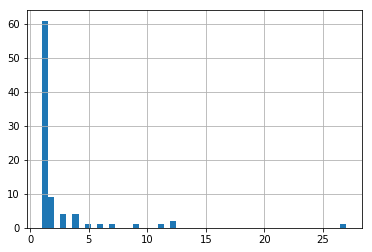

In [16]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = pd.Series([len(cc) for cc in connected_components])
connected_components_sizes.describe()
connected_components_sizes[connected_components_sizes < 1000].hist(bins=50)


## Discovering Communities


### Directed Graphs

In [18]:
import sys
sys.path.append('/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/py_scripts')
# from communities import find_communities_n, find_communities_modularity

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman



# d = {key:value for key,value in graph_dict.items()}

n = 2
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)
print ('# nodes:', G.number_of_nodes())
print ('# edges:', G.number_of_edges())

communities = girvan_newman(G)


# print (len(communities))
# print (communities)
# for i in communities:
#     print(i)
#     break

sort = tuple(sorted(c) for c in next(communities))

print(len(sort))
print(sort)

# for community in communities:
#     print(tuple(sorted(c) for c in community)) 

# nodes: 34
# edges: 32
3
(['Austin v. Hamilton (1991)', 'Barney v. Pulsipher (1998)', 'Caldwell v. Moore (1992)', 'Canton v. Harris (1989)', 'Coleman v. Turpen (1982)', 'Dodds v. Richardson (2010)', 'Draper v. Reynolds (2004)', 'Edwards v. Johnson (2000)', 'Graham v. Connor (1989)', 'Hinton v. City (1993)', 'Hudson v. McMillan (1992)', 'Ingraham v. Wright (1977)', 'Jasper v. Thalacker (1993)', 'Jenkins v. Wood (1996)', 'Johnson v. Jones (1995)', 'Kentucky v. Graham (1985)', 'Lopez v. LeMaster (1999)', 'Michenfelder v. Sumner (1988)', "Monell v. Dep't (1978)", 'Novitsky v. City (2007)', 'Porro v. Barnes 11/09/2010', 'Roska v. Peterson (2003)', 'Sacramento v. Lewis (1998)', 'Serna v. Colo. (2006)', 'Trujillo v. Williams (2006)'], ['Alaska v. Aragon (1946)', 'Cruz v. Maurer (2007)', 'FCC v. Pottsville (1940)', 'Garcia-Carbajal v. Holder 11/05/2010', 'Micheli v. Dir. (1988)', 'Sidabutar v. Gonzales (2007)', 'Solis-Muela v. I.N.S. (1993)', 'Weinberger v. Salfi (1975)'], ['Baker v. McCollan

In [68]:
pwd

'/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/notebooks'

In [19]:
graph_pos = nx.spring_layout(G)
# print(graph_pos)
# plt.show()

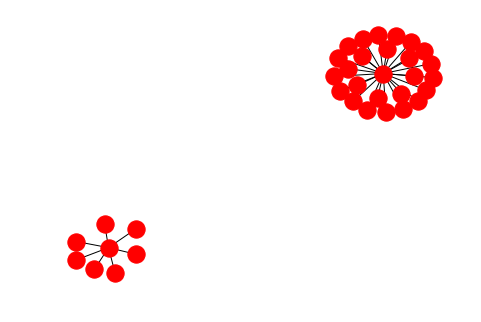

In [20]:
nx.draw(G)
# nx.draw_random(G)
# nx.draw_circular(G)
# nx.draw_spectral(G)

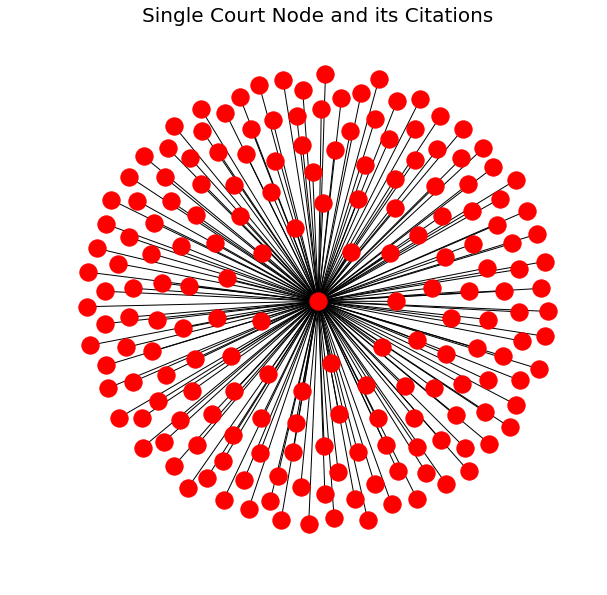

In [21]:
search_result = 'Arar v. Ashcroft 11/02/2009'

G = nx.Graph(graph_dict)

# print ('# nodes:', G.number_of_nodes())
# print ('# edges:', G.number_of_edges())

search_query = {k: graph_dict[k] for k in list(graph_dict) if k == search_result}

g = nx.Graph(search_query)

# community = girvan_newman(G)




# if search_result in graph_dict: 
#     print(G[search_result])

plt.figure(figsize=(10,10))
plt.title('Single Court Node and its Citations', size=20)
nx.draw(g)


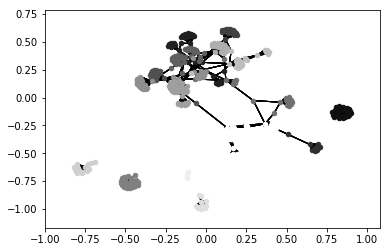

In [23]:
#other example to display a graph with its community :
#better with karate_graph() as defined in networkx examples
#erdos renyi don't have true community structure

import community 

n = 25
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)

# G = nx.erdos_renyi_graph(30, 0.05)

# print(G)
#first compute the best partition

partition = community.best_partition(G)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    nx.draw_networkx_edges(G, pos, alpha=0.5)


plt.show()

In [24]:
### Dendogram -- what's it for?? Hiearchical Clustering... but, for what? 
dendo = community.generate_dendrogram(G)
for level in range(len(dendo) - 1):
    print("partition at level", level, "is", partition_at_level(dendo, level))

In [24]:
## Produce the graph where nodes are the communities 
# g = G

n=5
g = nx.complete_graph(2*n)

part = dict([])
for node in g.nodes() :
    try: 
        part[node] = node % 2
    except: 
        continue

ind = community.induced_graph(part, g)
goal = nx.Graph()
goal.add_weighted_edges_from([(0,1,n*n),(0,0,n*(n-1)/2), (1, 1, n*(n-1)/2)])

print(goal)
# nx.is_isomorphic(int, goal)

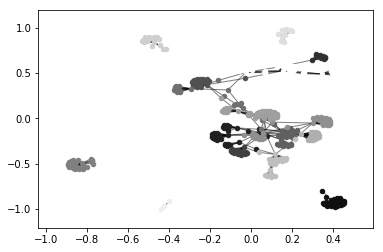

In [25]:

# Compute Modularity 
part = community.best_partition(G)
community.modularity(part, G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [26]:
# G.nodes()
print (nx.info(G))


Name: 
Type: Graph
Number of nodes: 420
Number of edges: 452
Average degree:   2.1524


In [27]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

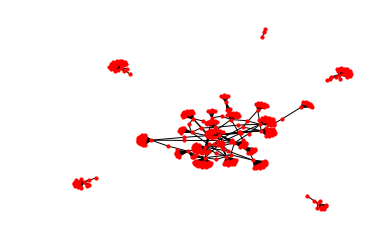

In [28]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 10)

## Community Detection

In [29]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

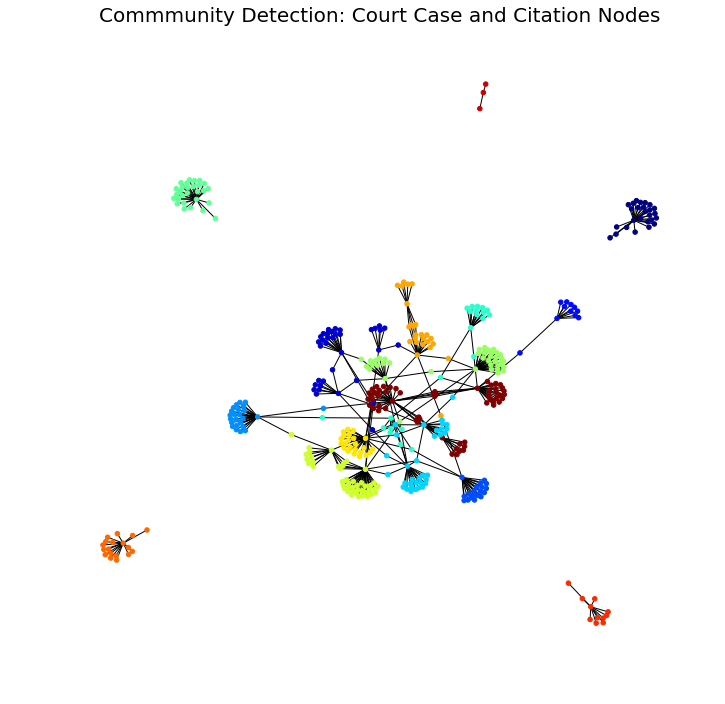

In [30]:
plt.figure(figsize=(12,12))
plt.title('Commmunity Detection: Court Case and Citation Nodes', size=20)
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 20, with_labels = False)

## Parallel Betweeness Centrality

In [31]:
from multiprocessing import Pool
import itertools


In [115]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [116]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [117]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [126]:
# bt = between_parallel(G)
# top = 10

# max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
# bt_values = [5]*len(G.nodes())
# bt_colors = [0]*len(G.nodes())

# print(bt_values)
# print(bt_colors)

# for ind, max_key, max_val in enumerate(max_nodes[0:3]):
# #     print (max_key), print(max_val)
# #     print(max_nodes[ind])
# #     bt_values[max_nodes[max_key]] = 150
# #     bt_colors[max_key] = 2
#     pass
    

# plt.axis("off")
# nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

## Additional Community Detection

In [32]:
n = 10
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}

G = nx.Graph(first_few_pairs)

communities = girvan_newman(G)
print(type(next(communities)))
print(type(communities))
sort = tuple(sorted(c) for c in next(communities))

print(len(sort))
print(sort)

<class 'tuple'>
<class 'generator'>
8
(['Austin v. Hamilton (1991)', 'Baker v. McCollan (1979)', 'Barney v. Pulsipher (1998)', 'Caldwell v. Moore (1992)', 'Canton v. Harris (1989)', 'Coleman v. Turpen (1982)', 'Dodds v. Richardson (2010)', 'Draper v. Reynolds (2004)', 'Edwards v. Johnson (2000)', 'Graham v. Connor (1989)', 'Hinton v. City (1993)', 'Hudson v. McMillan (1992)', 'Ingraham v. Wright (1977)', 'Jasper v. Thalacker (1993)', 'Jenkins v. Wood (1996)', 'Johnson v. Jones (1995)', 'Kentucky v. Graham (1985)', 'Lopez v. LeMaster (1999)', 'Michenfelder v. Sumner (1988)', "Monell v. Dep't (1978)", 'Novitsky v. City (2007)', 'Porro v. Barnes 11/09/2010', 'Roska v. Peterson (2003)', 'Sacramento v. Lewis (1998)', 'Serna v. Colo. (2006)', 'Trujillo v. Williams (2006)'], ['Alaska v. Aragon (1946)', 'Cruz v. Maurer (2007)', 'FCC v. Pottsville (1940)', 'Garcia-Carbajal v. Holder 11/05/2010', 'Micheli v. Dir. (1988)', 'Sidabutar v. Gonzales (2007)', 'Solis-Muela v. I.N.S. (1993)', 'Weinberge

In [33]:
G.edges(['Carpio v. Holder 01/13/2010'])

EdgeDataView([('Carpio v. Holder 01/13/2010', 'Choin v. Mukasey (2008)'), ('Carpio v. Holder 01/13/2010', 'Inc. v. Natural (1984)'), ('Carpio v. Holder 01/13/2010', 'Skidmore v. Swift (1944)'), ('Carpio v. Holder 01/13/2010', 'SEC v. Chenery (1947)'), ('Carpio v. Holder 01/13/2010', 'Herrera-Castillo v. Holder (2009)'), ('Carpio v. Holder 01/13/2010', 'United States v. Mead (2001)'), ('Carpio v. Holder 01/13/2010', 'Olson v. Fed. (2004)'), ('Carpio v. Holder 01/13/2010', 'Ochieng v. Mukasey (2008)'), ('Carpio v. Holder 01/13/2010', 'Niang v. Gonzales (2005)'), ('Carpio v. Holder 01/13/2010', 'Marmolejo-Campos v. Holder (2009)'), ('Carpio v. Holder 01/13/2010', "Quinchia v. Att'y (2008)"), ('Carpio v. Holder 01/13/2010', 'Rotimi v. Gonzales (2007)'), ('Carpio v. Holder 01/13/2010', 'Garcia-Quintero v. Gonzales (2006)'), ('Carpio v. Holder 01/13/2010', 'Gutnik v. Gonzales (2006)'), ('Carpio v. Holder 01/13/2010', 'McGraw v. Barnhart (2006)'), ('Carpio v. Holder 01/13/2010', 'Barnhart v. 

## Make Graph with Weighted Edges

In [67]:
n = 15

# G = nx.Graph(graph_dict)

first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}

# k = (list(graph_dict)[0])
# print(graph_dict[k])
# print(first_few_pairs)
g = nx.Graph()


def get_weights(list_a, list_b ):
    """
    :param list_a: string, first node
    :param list_b: string, next node
    :returns: int, weights
    
    """
    return len(set(list_a) & set(list_b))
     

for ind, (key, value) in enumerate(graph_dict.items()): 
    g.add_node(key)
    list_a = graph_dict[key]

    for inx, (other_nodes, other_values) in enumerate(graph_dict.items(), ind + 1): 
        list_b = graph_dict[other_nodes]   
        if list_a == list_b:
            continue
        else:  
            weight = get_weights(list_a, list_b)
            g.add_edge(key, other_nodes, weight = weight)
            #get_weights(list_a, list_b)
    
# for v in g:
#     for w in v.get_connections():
#         vid = v.get_id()
#         wid = w.get_id()
#         print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))



In [64]:
graph_dict['US v. Cruz-Rodriguez 06/24/2009']

['United States v. Bishop (2006)',
 'Gall v. United (2007)',
 'United States v. Gonzalez (2004)',
 'United States v. Van (2002)',
 'United States v. Farr (2008)',
 'United States v. Olano (1993)',
 'United States v. Zubia-Torres (2008)',
 'United States v. Teague (2006)',
 'United States v. Carrasco-Salazar (2007)',
 'United States v. Hardwell',
 'in part on (1996)',
 'United States v. Hawkins (2000)',
 'Ohler v. United (2000)',
 'United States v. Aptt (2004)',
 'United States v. Rios (1979)',
 'United States v. Arviso-Mata (2006)',
 'Gunnell v. Utah (1998)']

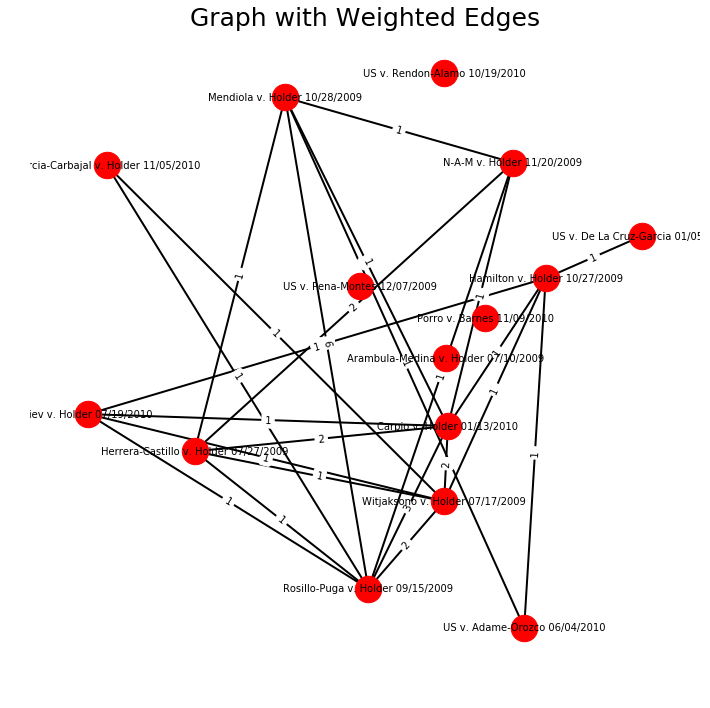

In [52]:
elarge=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] >0.5]
# esmall=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] <=0.5]

# pos=nx.spring_layout(g) # positions for all nodes
pos=nx.random_layout(g) # positions for all nodes


plt.figure(3,figsize=(12,12)) 
# nodes
nx.draw_networkx_nodes(g,pos,node_size=700)

# edges
nx.draw_networkx_edges(g,pos,edgelist=elarge,width=2)

# nx.draw_networkx_edges(g,pos,edgelist=esmall,
#                     width=4,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')

## Label Edge Weights and remove zeros from weights 
edge_labels = nx.get_edge_attributes(g,'weight')
edges= edge_labels
for key, value in edge_labels.items(): 
    if value == 0: 
        edge_labels[key] = ''

nx.draw_networkx_edge_labels(g, pos, edge_labels)
 

# Axes settings (make the spines invisible, remove all ticks and set title)
# ax = plt.gca()
# [sp.set_visible(False) for sp in ax.spines.values()]
# ax.set_xticks([])
# ax.set_yticks([])


plt.title('Graph with Weighted Edges', fontsize=25)
plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display



In [53]:
search_query='Carpio v. Holder 01/13/2010'

## get Adjacent List

In [103]:
# for v in g:
#     print ('g.vert_dict[%s]=%s' %(v.get_id(), g.vert_dict[v.get_id()]))

## Community Detection with Cases Only ** Citations are edge weights ** 

In [250]:
# communities = girvan_newman(G)
# print(type(next(communities)))
# print(type(communities))
# sort = tuple(sorted(c) for c in next(communities))

# print(len(sort))
# print(sort)

dict_keys(['Porro v. Barnes 11/09/2010', 'Garcia-Carbajal v. Holder 11/05/2010', 'US v. Rendon-Alamo 10/19/2010', 'Iliev v. Holder 07/19/2010', 'US v. Adame-Orozco 06/04/2010', 'Carpio v. Holder 01/13/2010', 'US v. De La Cruz-Garcia 01/05/2010', 'US v. Pena-Montes 12/07/2009', 'N-A-M v. Holder 11/20/2009', 'Mendiola v. Holder 10/28/2009', 'Hamilton v. Holder 10/27/2009', 'Rosillo-Puga v. Holder 09/15/2009', 'Herrera-Castillo v. Holder 07/27/2009', 'Witjaksono v. Holder 07/17/2009', 'Arambula-Medina v. Holder 07/10/2009'])
dict_values([0, 1, 2, 1, 1, 3, 1, 4, 3, 5, 1, 5, 3, 1, 6])


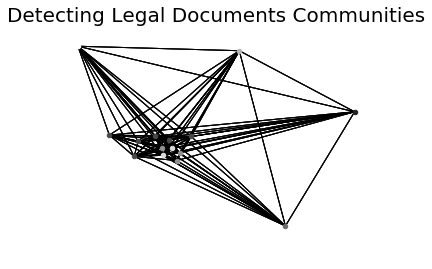

In [54]:
#other example to display a graph with its community :
#better with karate_graph() as defined in networkx examples
#erdos renyi don't have true community structure

import community 

partition = community.best_partition(g, weight='weight')
#drawing
size = float(len(set(partition.values())))

pos = nx.spring_layout(g)
# pos = nx.random_layout(g)

count = 0.

print(partition.keys())
print(partition.values())

for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20, node_color = str(count / size))
    
    nx.draw_networkx_edges(g, pos, alpha=0.5)


plt.title('Detecting Legal Documents Communities', fontsize=20)
plt.axis('off')
# plt.savefig("../images/legal_doc_communities") # save as png
plt.show() # display


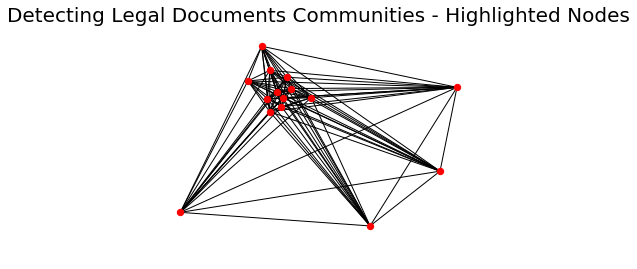

In [55]:
# print (nx.info(g))

#Create network layout for visualizations
spring_pos = nx.spring_layout(g)
plt.axis("off")
plt.title('Detecting Legal Documents Communities - Highlighted Nodes', fontsize=20)
nx.draw_networkx(g, pos = spring_pos, with_labels = False, node_size = 40)

[0, 1, 2, 1, 1, 3, 1, 4, 3, 5, 1, 5, 3, 1, 6]


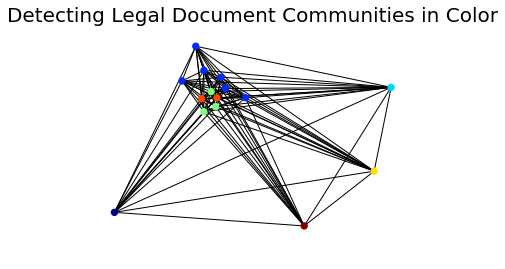

In [56]:
### Detecting Communities in Color
parts = community.best_partition(g)
values = [parts.get(node) for node in g.nodes()]
print(values)
plt.axis("off")
plt.title('Detecting Legal Document Communities in Color', fontsize=20)
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 40, with_labels = False)

## Build the Search/ Query Pipeline

    Goal: Build up 2 searchable dictionaries: 
		— #1 — key, value pair — Nodes, Communities 
		— #2 — key, value pair — Communities, Nodes 
        
    ## Search Pipeline: 
            Step 1: 
				Look up the Node and return its communities. 
			Step 2: 
				Look up the communities, and return their node values. 
					— this is the SEARCH function. 
			Step 3: 
				Find the MOST similar nodes within that community. 
                    -- Use SUBGRAPHS and SIMRANK 



### The Node, Community & Community, Node Dictionaries (2-3 mins to run)

In [69]:
### Node, Community Dictionary
import community 

parts = community.best_partition(g, weight='weight')

### Community, Node Dictionary 
community_node_dict={}
for key, value in parts.items(): 
    if value not in community_node_dict: 
        community_node_dict[value] = [key]
    else: 
        community_node_dict[value].append(key)
# print(parts)
# print("")
# print(community_node_dict)


### Step 1: Look up what community the case is a part of

In [73]:
search_query='Carpio v. Holder 01/13/2010'
community_value = parts[search_query]
print(community_value)


3


### Step 2: Look up what cases are in the community 

In [75]:
commuity_nodes = community_node_dict[community_value]
print(len(commuity_nodes))
print(commuity_nodes)

524
['Carpio v. Holder 01/13/2010', 'N-A-M v. Holder 11/20/2009', 'Mendiola v. Holder 10/28/2009', 'Rosillo-Puga v. Holder 09/15/2009', 'Herrera-Castillo v. Holder 07/27/2009', 'Wei v. Mukasey 11/10/2008', 'Lee v. Mukasey 06/03/2008', 'US v. Ochoa-Colchado 04/14/2008', 'Ochieng v. Mukasey 03/18/2008', 'Lorenzo v. Mukasey 11/21/2007', 'Sosa-Valenzuela v. Gonzales 05/02/2007', 'Padilla-Caldera v. Gonzales 06/20/2006', 'Padill-Caldera v. Gonzales 10/19/2005', 'Niang v. Gonzales 09/09/2005', 'US v. ATANDI 07/26/2004', 'KHALAYLEH v. IMMIGRATION & NATURALIZATION SERV. 04/23/2002', 'TAPIA-GARCIA v. INS 01/22/2001', 'Rodriguez v. U.S. Dept. of Homeland Sec. 01/05/2011', 'Ibarra v. Swacina 12/29/2010', 'US v. Forey-Quintero 12/01/2010', 'Alvarado v. US Atty. Gen. 07/08/2010', 'Ward v. U.S. Atty. Gen. 06/03/2010', 'Vila v. US Atty. Gen. 03/10/2010', 'Yu v. US Attorney Gen. 05/27/2009', 'Chen v. U.S. Atty. Gen. 04/13/2009', 'Quinchia v. U.S. Attorney Gen. 12/18/2008', 'Quinchia v. US Atty. Gen. 0

### Step 3: Find the MOST similar cases to my top case result in its graph community 

In [90]:
#### Subgraphs == Try simrank later... 
# import graphsim as gs

search_query='Carpio v. Holder 01/13/2010'

H = g.subgraph(commuity_nodes)

# print(H.edges())
# print('')

edges = H.edges(data=True)
# print(edges)

## list of 3-tuples; where 3rd item is dictionary {'weight': value}

community = [tup for tup in edges if search_query in tup]

sort = sorted(community, key=lambda x: x[2]['weight'])[::-1][:5]



weighted_results_list = defaultdict(None)


for tup in sort: 
    for item in tup: 
#         print(item)
        if search_query not in item and type(item) != dict: 
            weighted_results_list[item] = None
        elif type(item) == dict:
            weighted_results_list[tup[1]] = item
        else: 
            continue

print(weighted_results_list) ## With weights 
# for key, value in weighted_results_list.items(): 
#     print((key, value['weight']))
# print(weighted_results_list.keys()) ## without weights 

print([res for res in weighted_results_list.keys()])
            
# sort = [(sorted(tup[2]) for tup in edges)]

# print(sort)

defaultdict(None, {'De Leon-Ochoa v. Attorney General 10/01/2010': {'weight': 7}, 'Quinchia v. US Atty. Gen. 08/07/2008': {'weight': 6}, 'Quinchia v. U.S. Attorney Gen. 12/18/2008': {'weight': 6}, 'Barrios v. Holder 05/27/2009': {'weight': 5}, 'Joseph v. Holder 08/27/2009': {'weight': 5}})
['De Leon-Ochoa v. Attorney General 10/01/2010', 'Quinchia v. US Atty. Gen. 08/07/2008', 'Quinchia v. U.S. Attorney Gen. 12/18/2008', 'Barrios v. Holder 05/27/2009', 'Joseph v. Holder 08/27/2009']


In [92]:
results = {key: value['weight'] for key, value in weighted_results_list.items()} 
results

{'Barrios v. Holder 05/27/2009': 5,
 'De Leon-Ochoa v. Attorney General 10/01/2010': 7,
 'Joseph v. Holder 08/27/2009': 5,
 'Quinchia v. U.S. Attorney Gen. 12/18/2008': 6,
 'Quinchia v. US Atty. Gen. 08/07/2008': 6}

In [369]:
### Dendogram -- what's it for?? Hiearchical Clustering... but, for what? 
# dendo = community.generate_dendrogram(g, weight='weight')
# for level in range(len(dendo) - 1):
#     print("partition at level", level, "is", community.partition_at_level(dendo, level))
    

### HOW CAN I FIGURE OUT WHICH COMMUNITIES ARE ACTUALLY CONNECTED??? 


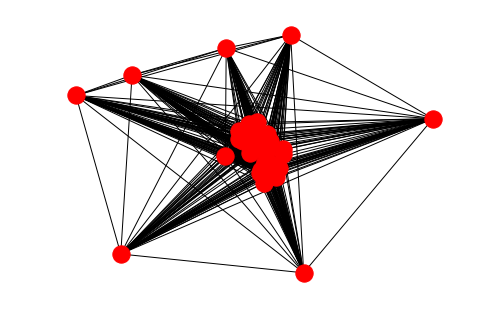

In [312]:
import networkx as nx
import pylab as plt

target_node = search_query

# graphviz_layout
pos=nx.spring_layout(g,weight="weight")

#### HOW CAN I FIGURE OUT WHICH COMMUNITIES ARE ACTUALLY CONNECTED??? 


for h in nx.connected_component_subgraphs(g):
    if target_node in h:
        nx.draw(h,pos,node_color='red')
    else:
        nx.draw(h,pos,node_color='white')
    
    
plt.show()

## Explore more here!! How to access communities right here... 

In [317]:
parts = community.best_partition(g)
print(parts)
values = [parts.get(node) for node in g.nodes()]
print(values)


{'PORRO v. BARNES; (2010)': 0, 'GARCIA-CARBAJAL v. H. HOLDER (2010)': 1, 'UNITED STATES v. RENDON-ALAMO (2010)': 2, 'ILIEV v. H. HOLDER (2010)': 1, 'UNITED STATES v. F. ADAME-OROZCO (2010)': 3, 'CARPIO v. J. HOLDER (2010)': 1, 'UNITED STATES v. CRUZ-GARCIA (2010)': 2, 'UNITED STATES v. PENA-MONTES (2009)': 4, 'N-A-M v. H. HOLDER S. C. (2009)': 1, 'MENDIOLA v. H. HOLDER (2009)': 1, 'HAMILTON v. H. HOLDER (2009)': 2, 'ROSILLO-PUGA v. H. HOLDER (2009)': 1, 'HERRERA-CASTILLO v. H. HOLDER (2009)': 1, 'WITJAKSONO v. H. HOLDER (2009)': 1, 'ARAMBULA-MEDINA v. H. HOLDER (2009)': 1, 'UNITED STATES v. CRUZ-RODRIGUEZ (2009)': 3, 'FM ALZAINATI v. H. HOLDER (2009)': 1, 'RAZKANE v. H. HOLDER (2009)': 1, 'AL-MALEKI v. H. HOLDER S. III (2009)': 5, 'UNITED STATES v. NAVARRETE-MEDINA (2009)': 6, 'UNITED STATES v. YANEZ-RODRIGUEZ (2009)': 2, 'UNITED STATES v. ALGARATE-VALENCIA (2008)': 3, 'UNITED STATES v. ALAPIZCO-VALENZUELA (2008)': 3, 'WEI v. B. MUKASEY (2008)': 1, 'RIBAS v. B. MUKASEY (2008)': 1, 'UNI

In [322]:
communities = girvan_newman(g)
sort = tuple(sorted(c) for c in next(communities))

print(len(sort))
print(sort)

2
(['PORRO v. BARNES; (2010)'], ['AL-MALEKI v. H. HOLDER S. III (2009)', 'ARAMBULA-MEDINA v. H. HOLDER (2009)', 'BATREZ GRADIZ v. R. GONZALES (2007)', 'CARPIO v. J. HOLDER (2010)', 'FM ALZAINATI v. H. HOLDER (2009)', 'GARCIA-CARBAJAL v. H. HOLDER (2010)', 'HAMILTON v. H. HOLDER (2009)', 'HAYRAPETYAN v. B. MUKASEY (2008)', 'HERRERA-CASTILLO v. H. HOLDER (2009)', 'ILIEV v. H. HOLDER (2010)', 'ISMAIEL v. MUKASEY\u20091 (2008)', 'LEE v. B. MUKASEY (2008)', 'LORENZO v. B. MUKASEY (2007)', 'MARTIN v. B. MUKASEY (2008)', 'MENDIOLA v. H. HOLDER (2009)', 'N-A-M v. H. HOLDER S. C. (2009)', 'NASIOUS v. TWO UNKNOWN B.I.C.E. AGENTS AT ARAPAHOE COUNTY JUSTICE CENTER W. CMS; CMS; CMS; \u2009CEO J. R.N. H.S.A. (2007)', 'OCHIENG v. B. MUKASEY,* (2008)', 'RAZKANE v. H. HOLDER (2009)', 'RIBAS v. B. MUKASEY (2008)', 'ROSILLO-PUGA v. H. HOLDER (2009)', 'SIDABUTAR v. R. GONZALES (2007)', 'THONGPHILACK v. R. GONZALES (2007)', 'UNITED STATES v. ALAPIZCO-VALENZUELA (2008)', 'UNITED STATES v. ALGARATE-VALENCIA 

In [87]:

def simrank(G, c=0.9, max_iter=100, remove_neighbors=False, remove_self=False, dump_process=False):
    """Return the SimRank similarity between nodes
        Parameters
        -----------
        G : graph
        A NetworkX graph
        c : float, 0 < c <= 1
        The number represents the relative importance between in-direct neighbors
        and direct neighbors
        max_iter : integer
        The number specifies the maximum number of iterations for simrank
        calculation
        remove_neighbors: boolean
        if true, the similarity value between neighbor nodes is set to zero
        remove_self : boolean
        if true, the similarity value between a node and itself is set to zero
        dump_process: boolean
        if true, the calculation process is dumped
        Returns
        -------
        simrank: dictionary of dictionary of double
        if simrank[i][j] = k, this means the SimRank similarity
        between node i and node j is k
        Examples
        --------
        >>> G=nx.Graph()
        >>> G.add_edges_from([(0,7), (0,1), (0,2), (0,3), (1,4), (2,4), (3,4), (4,5), (4,6)])
        >>> networkx_addon.similarity.simrank(G)
        Notes
        -----
        References
        ----------
        [1] G. Jeh and J. Widom.
        SimRank: a measure of structural-context similarity.
        In KDD'02 pages 538-543. ACM Press, 2002.
        """
    if type(G) == nx.MultiGraph or type(G) == nx.MultiDiGraph:
        raise Exception("simrank() not defined for graphs with multiedges.")

    if G.is_directed():
        raise Exception("simrank() not defined for directed graphs.")

    sim_old = defaultdict(list)
    sim = defaultdict(list)
    for n in G.nodes():
        sim[n] = defaultdict(int)
        sim[n][n] = 1
        sim_old[n] = defaultdict(int)
        sim_old[n][n] = 0

  # calculate simrank
    for iter_ctr in range(max_iter):
        if _is_converge(sim, sim_old):
            break
    sim_old = copy.deepcopy(sim)
    for i, u in enumerate(G.nodes()):
        if dump_process:
            sys.stdout.write("\r%d : % d / %d" % (iter_ctr, i, G.number_of_nodes()))
        for v in G.nodes():
            if u == v:
                continue
            s_uv = 0.0
            for n_u in G.neighbors(u):
                for n_v in G.neighbors(v):
                    s_uv += sim_old[n_u][n_v]
            sim[u][v] = (c * s_uv / (len(G.neighbors(u).next())) * len(G.neighbors(v).next())) \
                if len(G.neighbors(u).next()) * len(G.neighbors(v).next()) > 0 else 0
    if dump_process:
        print ('')

    if remove_self:
        for m in G.nodes():
            G[m][m] = 0

    if remove_neighbors:
        for m in G.nodes():
            for n in G.neighbors(m):
                sim[m][n] = 0

    return sim

def _is_converge(s1, s2, eps=1e-4):
    for i in s1.keys():
        for j in s1[i].keys():
            if abs(s1[i][j] - s2[i][j]) >= eps:
                return False
    return True
